In [341]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import SimpleImputer
from statsmodels.stats.outliers_influence import variance_inflation_factor
from patsy import dmatrices
from statsmodels.stats.anova import anova_lm
from statsmodels.formula.api import ols
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, SGDRegressor
from sklearn.ensemble import GradientBoostingRegressor, RandomForestRegressor, AdaBoostRegressor, VotingRegressor, BaggingRegressor
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_log_error
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from scipy.spatial.distance import cdist
%matplotlib inline

In [2]:
df_train = pd.read_csv("train.csv")
df_test = pd.read_csv("test.csv")
df_train["type"] = "train"
df_test["type"] = "test"

In [3]:
df = pd.concat([df_train, df_test])

c:\users\ankur.jain1\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  """Entry point for launching an IPython kernel.


In [4]:
df.isnull().sum().sort_values(ascending = False)

PoolQC         2909
MiscFeature    2814
Alley          2721
Fence          2348
SalePrice      1459
               ... 
Id                0
HouseStyle        0
HeatingQC         0
YrSold            0
1stFlrSF          0
Length: 82, dtype: int64

In [5]:
df_test.drop(["PoolQC","MiscFeature","Alley","Fence","FireplaceQu"], axis =1, inplace = True)
df_train.drop(["PoolQC","MiscFeature","Alley","Fence","FireplaceQu"], axis =1, inplace = True)

In [6]:
df_test.isnull().sum().sort_values(ascending = False)

LotFrontage     227
GarageQual       78
GarageYrBlt      78
GarageFinish     78
GarageCond       78
               ... 
Electrical        0
CentralAir        0
HeatingQC         0
Heating           0
Id                0
Length: 76, dtype: int64

In [7]:
df_trnum = df_train[[i for i in df_train.columns if df_train[i].dtypes != "O"]].copy()
df_tenum = df_test[[i for i in df_test.columns if df_test[i].dtypes != "O"]].copy()

In [8]:
df_trnum.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 38 columns):
Id               1460 non-null int64
MSSubClass       1460 non-null int64
LotFrontage      1201 non-null float64
LotArea          1460 non-null int64
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
MasVnrArea       1452 non-null float64
BsmtFinSF1       1460 non-null int64
BsmtFinSF2       1460 non-null int64
BsmtUnfSF        1460 non-null int64
TotalBsmtSF      1460 non-null int64
1stFlrSF         1460 non-null int64
2ndFlrSF         1460 non-null int64
LowQualFinSF     1460 non-null int64
GrLivArea        1460 non-null int64
BsmtFullBath     1460 non-null int64
BsmtHalfBath     1460 non-null int64
FullBath         1460 non-null int64
HalfBath         1460 non-null int64
BedroomAbvGr     1460 non-null int64
KitchenAbvGr     1460 non-null int64
TotRmsAbvGrd     1460 non-null int64
F

In [9]:
def num_missing(data):
    for i in data:
        data[i] = data[i].fillna(data[i].median())

In [10]:
num_missing(df_trnum)
num_missing(df_tenum)

In [ ]:
sns.pairplot(df_trnum)

KeyboardInterrupt: 

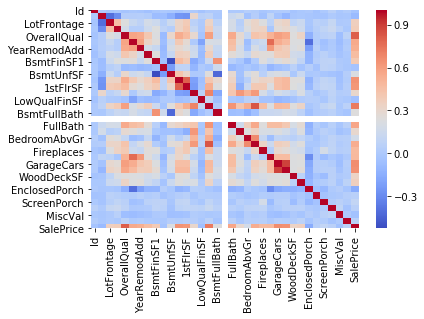

In [340]:
tr_corr = df_trnum.corr()
#plt.figure(figsize = (10,10))
sns.heatmap(tr_corr, cmap = "coolwarm")

In [12]:
feat = "+".join(df_trnum.columns)
feat[:-269]

'Id+MSSubClass+LotFrontage+LotArea+OverallQual+OverallCond+YearBuilt+YearRemodAdd+MasVnrArea+BsmtFinSF1+BsmtFinSF2+BsmtUnfSF+TotalBsmtSF'

In [13]:
X = df_trnum.drop(["SalePrice"], axis =1)
y = df_trnum[["SalePrice"]]

In [14]:
vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif["cols"] = X.columns

vif

c:\users\ankur.jain1\appdata\local\programs\python\python37\lib\site-packages\statsmodels\stats\outliers_influence.py:193: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)


,VIF Factor,cols
0,4.111627e+00,Id
1,4.652262e+00,MSSubClass
2,1.734088e+01,LotFrontage
3,2.649185e+00,LotArea
4,6.670052e+01,OverallQual
5,4.170905e+01,OverallCond
6,2.128559e+04,YearBuilt
7,2.244003e+04,YearRemodAdd
8,1.847952e+00,MasVnrArea
9,inf,BsmtFinSF1


In [15]:
df_trnum = df_trnum.drop(["YrSold", "KitchenAbvGr", "OverallCond"], axis = 1)
df_tenum = df_tenum.drop(["YrSold", "KitchenAbvGr", "OverallCond"], axis = 1)

In [16]:
def out_treat(data):
    for i in data:
        mean = data[i].mean()
        std = data[i].std()
        data[i] = np.where(data[i] < mean - (3* std), int(mean - (3* std)), data[i])
        data[i] = np.where(data[i] > mean + (3* std), int(mean + (3* std)), data[i])

In [17]:
df_trnum.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,SalePrice
count,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,69.863699,10516.828082,6.099315,1971.267808,1984.865753,103.117123,443.639726,46.549315,...,472.980137,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,180921.195890
std,421.610009,42.300571,22.027677,9981.264932,1.382997,30.202904,20.645407,180.731373,456.098091,161.319273,...,213.804841,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,34900.000000
25%,365.750000,20.000000,60.000000,7553.500000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.000000,...,334.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,1973.000000,1994.000000,0.000000,383.500000,0.000000,...,480.000000,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,163000.000000
75%,1095.250000,70.000000,79.000000,11601.500000,7.000000,2000.000000,2004.000000,164.250000,712.250000,0.000000,...,576.000000,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,...,1418.000000,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,755000.000000


In [18]:
out_treat(df_trnum)
out_treat(df_tenum)

In [19]:
df_trcat = df_train[[i for i in df_train.columns if df_train[i].dtypes == "O"]].copy()
df_tecat = df_test[[i for i in df_test.columns if df_test[i].dtypes == "O"]].copy()

In [20]:
df_trcat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 39 columns):
MSZoning         1460 non-null object
Street           1460 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 non-null object
Exterior2nd      1460 non-null object
MasVnrType       1452 non-null object
ExterQual        1460 non-null object
ExterCond        1460 non-null object
Foundation       1460 non-null object
BsmtQual         1423 non-null object
BsmtCond         1423 non-null object
BsmtExposure     1422 non-null object
BsmtFinType1     14

In [21]:
def cat_missing(data):
    for i in data:
        data[i] = data[i].fillna(method = "ffill")

In [22]:
cat_missing(df_trcat)
cat_missing(df_tecat)

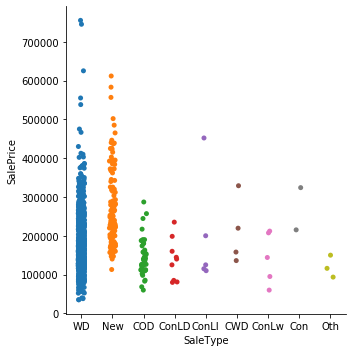

In [23]:
sns.catplot(x = "SaleType", y= "SalePrice", data = df_train, ci = None)

In [24]:
"Exterior1st","Exterior2nd","BsmtFinType1","BsmtFinType2","Functional","SaleType"

('Exterior1st',
 'Exterior2nd',
 'BsmtFinType1',
 'BsmtFinType2',
 'Functional',
 'SaleType')

In [33]:
feat_cat = "SalePrice ~ "
for i in df_trcat:
    feat_cat += "C(" +  i + ") + "
feat_cat = feat_cat[:-28]
feat_cat

'SalePrice ~ C(MSZoning) + C(Street) + C(LotShape) + C(LandContour) + C(Utilities) + C(LotConfig) + C(LandSlope) + C(Neighborhood) + C(Condition1) + C(Condition2) + C(BldgType) + C(HouseStyle) + C(RoofStyle) + C(RoofMatl) + C(Exterior1st) + C(Exterior2nd) + C(MasVnrType) + C(ExterQual) + C(ExterCond) + C(Foundation) + C(BsmtQual) + C(BsmtCond) + C(BsmtExposure) + C(BsmtFinType1) + C(BsmtFinType2) + C(Heating) + C(HeatingQC) + C(CentralAir) + C(Electrical) + C(KitchenQual) + C(Functional) + C(GarageType) + C(GarageFinish) + C(GarageQual) + C(GarageCond) + C(PavedDrive) + C(SaleType) + C(SaleCondition)'

In [26]:
df_trcat["SalePrice"] = df_train["SalePrice"]

In [34]:
# ANOVA to check Categorical variables effectiveness
model  = ols(feat_cat, df_trcat).fit()

anova_table = anova_lm(model)
print(anova_table)

                      df        sum_sq       mean_sq           F  \
C(MSZoning)          4.0  9.904000e+11  2.476000e+11  213.748248   
C(Street)            1.0  8.092688e+08  8.092688e+08    0.698626   
C(LotShape)          3.0  4.163958e+11  1.387986e+11  119.822133   
C(LandContour)       3.0  1.296003e+11  4.320009e+10   37.293796   
C(Utilities)         1.0  4.677767e+09  4.677767e+09    4.038225   
C(LotConfig)         4.0  2.630036e+10  6.575091e+09    5.676148   
C(LandSlope)         2.0  9.348018e+09  4.674009e+09    4.034980   
C(Neighborhood)     24.0  3.689282e+12  1.537201e+11  132.703551   
C(Condition1)        8.0  5.746562e+10  7.183203e+09    6.201118   
C(Condition2)        7.0  5.145090e+10  7.350129e+09    6.345222   
C(BldgType)          4.0  2.918382e+11  7.295956e+10   62.984560   
C(HouseStyle)        7.0  1.490079e+11  2.128684e+10   18.376511   
C(RoofStyle)         5.0  1.722708e+11  3.445417e+10   29.743609   
C(RoofMatl)          7.0  1.839894e+11  2.628420

In [35]:
df_cat = pd.concat([df_trcat, df_tecat]).copy()

c:\users\ankur.jain1\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  """Entry point for launching an IPython kernel.


In [36]:
df_num = pd.concat([df_trnum, df_tenum]).copy()

c:\users\ankur.jain1\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  """Entry point for launching an IPython kernel.


In [37]:
df_cat.drop(["SalePrice"], axis = 1, inplace = True)

In [38]:
df_f = pd.concat([df_num,df_cat], axis = 1)

In [39]:
Kitchenqual = {"Ex" : 5, "Gd" : 4, "TA"  :3 , "Fa" : 2, "Po" :1}

df_f["KitchenQual"] = df_f["KitchenQual"].map(Kitchenqual)

In [74]:
df_f.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2919 entries, 0 to 1458
Data columns (total 72 columns):
1stFlrSF         2919 non-null int64
2ndFlrSF         2919 non-null int64
3SsnPorch        2919 non-null int64
BedroomAbvGr     2919 non-null int64
BsmtFinSF1       2919 non-null float64
BsmtFinSF2       2919 non-null float64
BsmtFullBath     2919 non-null float64
BsmtHalfBath     2919 non-null float64
BsmtUnfSF        2919 non-null float64
EnclosedPorch    2919 non-null int64
Fireplaces       2919 non-null int64
FullBath         2919 non-null int64
GarageArea       2919 non-null float64
GarageCars       2919 non-null float64
GarageYrBlt      2919 non-null float64
GrLivArea        2919 non-null int64
HalfBath         2919 non-null int64
Id               2919 non-null int64
LotArea          2919 non-null int64
LotFrontage      2919 non-null float64
LowQualFinSF     2919 non-null int64
MSSubClass       2919 non-null int64
MasVnrArea       2919 non-null float64
MiscVal          2919 

In [41]:
df_f["FireplaceQu"] = df["FireplaceQu"]

In [42]:
Fireplacequ = {"Ex" : 5, "Gd" : 4, "TA"  :3 , "Fa" : 2, "Po" :1, np.nan : 0}
df_f["FireplaceQu"] = df_f["FireplaceQu"].map(Fireplacequ)

In [43]:
GarageQual = {"Ex" : 5, "Gd" : 4, "TA"  :3 , "Fa" : 2, "Po" :1, np.nan : 0}
df_f["GarageQual"] = df_f["GarageQual"].map(GarageQual)

In [44]:
GarageCond = {"Ex" : 5, "Gd" : 4, "TA"  :3 , "Fa" : 2, "Po" :1, np.nan : 0}
df_f["GarageCond"] = df_f["GarageCond"].map(GarageCond)

In [45]:
PavedDrive = {"Y"  :3 , "P" : 2, "N" :1}
df_f["PavedDrive"] = df_f["PavedDrive"].map(PavedDrive)

In [46]:
Street = {"Grvl" : 1, "Pave" : 0}
df_f["Street"] = df_f["Street"].map(Street)

In [47]:
LotShape = {"Reg" : 4, "IR1"  :3 , "IR2" : 2, "IR3" :1}
df_f["LotShape"] = df_f["LotShape"].map(LotShape)

In [48]:
Utilities = {"AllPub" : 4, "NoSewr"  :3 , "NoSeWa" : 2, "ELO" :1}
df_f["Utilities"] = df_f["Utilities"].map(Utilities)

In [49]:
dict_o = {"Norm" : 1, "RRAn" : 1, "RRNe" : 1, "Feedr" : 0, "Artery" : 0, "RRAe" : 0, "PosN" : 2, "RRNn" : 2, "PosA": 2}
df_f["Condition1"] = df_f["Condition1"].map(dict_o)
df_f["Condition2"] = df_f["Condition2"].map(dict_o)

In [50]:
BsmtCond = {"Ex" : 5, "Gd" : 4, "TA"  :3 , "Fa" : 2, "Po" :1, np.nan : 0}
df_f["BsmtCond"] = df_f["BsmtCond"].map(BsmtCond)

In [51]:
BsmtExposure = {"Gd" : 4, "Av"  :3 , "Mn" : 2, "No" :1, np.nan : 0}
df_f["BsmtExposure"] = df_f["BsmtExposure"].map(BsmtExposure)

In [52]:
BsmtFinType = {"GLQ" : 6, "ALQ" : 5, "BLQ"  :4 , "Rec" : 3, "LwQ" :2, "Unf" : 1,np.nan : 0}
df_f["BsmtFinType1"] = df_f["BsmtFinType1"].map(BsmtFinType)
df_f["BsmtFinType2"] = df_f["BsmtFinType2"].map(BsmtFinType)

In [53]:
BsmtQual = {"Ex" : 5, "Gd" : 4, "TA"  :3 , "Fa" : 2, "Po" :1, np.nan : 0}
df_f["BsmtQual"] = df_f["BsmtQual"].map(BsmtQual)

In [54]:
CentralAir = {"Y" : 1, "N" : 0}
df_f["CentralAir"] = df_f["CentralAir"].map(CentralAir)

In [55]:
Electrical = {"SBrkr" : 5, "FuseA" : 4, "FuseF"  :3 , "FuseP" : 2, "Mix" :1, np.nan : 0}
df_f["Electrical"] = df_f["Electrical"].map(Electrical)

In [56]:
ExterQual = {"Ex" : 5, "Gd" : 4, "TA"  :3 , "Fa" : 2, "Po" :1, np.nan : 0}
df_f["ExterQual"] = df_f["ExterQual"].map(ExterQual)

In [57]:
ExterCond = {"Ex" : 5, "Gd" : 4, "TA"  :3 , "Fa" : 2, "Po" :1, np.nan : 0}
df_f["ExterCond"] = df_f["ExterCond"].map(ExterCond)

In [58]:
GarageFinish = {"Fin"  :3 , "RFn" : 2, "Unf" :1, np.nan : 0}
df_f["GarageFinish"] = df_f["GarageFinish"].map(GarageFinish)

In [59]:
HeatingQC = {"Ex" : 5, "Gd" : 4, "TA"  :3 , "Fa" : 2, "Po" :1, np.nan : 0}
df_f["HeatingQC"] = df_f["HeatingQC"].map(HeatingQC)

In [60]:
df_f[(df_f["Heating"] == "GasW") & (df_f["type"] == "train")]["SalePrice"].sum()/df_f[(df_f["Heating"] == "GasW") & (df_f["type"] == "train")]["SalePrice"].count()

166632.16666666666

In [62]:
def cat_meanvals(data, feature):
    for j in data[feature].unique():
        s = data[(data[feature] == j) & (df_f["type"] == "train")]["SalePrice"].mean()
        data[feature] = np.where(data[feature] == j, s, data[feature])
    data[feature] = data[feature].astype('int32')

In [63]:
cat_meanvals(df_f, "Heating")

In [64]:
cat_meanvals(df_f, "HouseStyle")

In [65]:
cat_meanvals(df_f, "LandContour")

In [66]:
LandSlope = {"Gtl"  :3 , "Mod" : 2, "Sev" :1, np.nan : 0}
df_f["LandSlope"] = df_f["LandSlope"].map(LandSlope)

In [67]:
cat_meanvals(df_f, "LotConfig")

In [68]:
cat_meanvals(df_f, "MSZoning")

In [69]:
cat_meanvals(df_f, "RoofStyle")

In [70]:
cat_meanvals(df_f, "Exterior1st")
cat_meanvals(df_f, "Exterior2nd")

In [71]:
Foundation = {"PConc" : 6, "Wood" : 5, "Stone"  :4 , "CBlock" : 3, "BrkTil" :2, "Slab" : 1,np.nan : 0}
df_f["Foundation"] = df_f["Foundation"].map(Foundation)

In [72]:
df_f.drop(["Electrical", "Functional","RoofMatl"], axis =1, inplace  = True)

In [73]:
pd.set_option("display.max_columns", None)
df_f.head()

,1stFlrSF,2ndFlrSF,3SsnPorch,BedroomAbvGr,BsmtFinSF1,BsmtFinSF2,BsmtFullBath,BsmtHalfBath,BsmtUnfSF,EnclosedPorch,Fireplaces,FullBath,GarageArea,GarageCars,GarageYrBlt,GrLivArea,HalfBath,Id,LotArea,LotFrontage,LowQualFinSF,MSSubClass,MasVnrArea,MiscVal,MoSold,OpenPorchSF,OverallQual,PoolArea,SalePrice,ScreenPorch,TotRmsAbvGrd,TotalBsmtSF,WoodDeckSF,YearBuilt,YearRemodAdd,BldgType,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,BsmtQual,CentralAir,Condition1,Condition2,ExterCond,ExterQual,Exterior1st,Exterior2nd,Foundation,GarageCond,GarageFinish,GarageQual,GarageType,Heating,HeatingQC,HouseStyle,KitchenQual,LandContour,LandSlope,LotConfig,LotShape,MSZoning,MasVnrType,Neighborhood,PavedDrive,RoofStyle,SaleCondition,SaleType,Street,Utilities,type,FireplaceQu
0,856,854,0,3,706.0,0.0,1.0,0.0,150.0,0,0,2,548.0,2.0,2003.0,1710,1,1,8450,65.0,0,60,196.0,0,2,61,7,0,208500.0,0,8,856.0,0,2003,2003,1Fam,3,1,6,1,4,1,1,1,3,4,212147,212812,6,3,2,3,Attchd,180580,5,206765,4,178720,3,176051,4,189266,BrkFace,CollgCr,3,171044,Normal,WD,0,4,train,0
1,1262,0,0,3,978.0,0.0,0.0,0.0,284.0,0,1,2,460.0,2.0,1976.0,1262,0,2,9600,80.0,0,20,0.0,0,5,0,6,0,181500.0,0,6,1262.0,298,1976,1976,1Fam,3,4,5,1,4,1,0,1,3,3,149422,149803,3,3,2,3,Attchd,180580,5,175243,3,178720,3,177934,4,189266,None,Veenker,3,171044,Normal,WD,0,4,train,3
2,920,866,0,3,486.0,0.0,1.0,0.0,434.0,0,1,2,608.0,2.0,2001.0,1786,1,3,11250,68.0,0,60,162.0,0,9,42,7,0,223500.0,0,6,920.0,0,2001,2002,1Fam,3,2,6,1,4,1,1,1,3,4,212147,212812,6,3,2,3,Attchd,180580,5,206765,4,178720,3,176051,3,189266,BrkFace,CollgCr,3,171044,Normal,WD,0,4,train,3
3,961,756,0,3,216.0,0.0,1.0,0.0,540.0,205,1,1,642.0,3.0,1998.0,1717,0,4,9550,60.0,0,70,0.0,0,2,35,7,0,140000.0,0,7,756.0,0,1915,1970,1Fam,4,1,5,1,3,1,1,1,3,3,147989,158203,2,3,1,3,Detchd,180580,4,206765,4,178720,3,178983,3,189266,None,Crawfor,3,171044,Abnorml,WD,0,4,train,4
4,1145,1053,0,4,655.0,0.0,1.0,0.0,490.0,0,1,2,836.0,3.0,2000.0,2198,1,5,14260,84.0,0,60,350.0,0,12,84,8,0,250000.0,0,9,1145.0,192,2000,2000,1Fam,3,3,6,1,4,1,1,1,3,4,212147,212812,6,3,2,3,Attchd,180580,5,206765,4,178720,3,177934,3,189266,BrkFace,NoRidge,3,171044,Normal,WD,0,4,train,3


In [75]:
scale = MinMaxScaler()

In [76]:
scale.fit(df_f[["Exterior1st","Exterior2nd","Heating","HouseStyle","LandContour","LotConfig","MSZoning","RoofStyle"]])

MinMaxScaler(copy=True, feature_range=(0, 1))

In [77]:
df_f[["Exterior1st","Exterior2nd","Heating","HouseStyle","LandContour","LotConfig","MSZoning","RoofStyle"]] = scale.transform(df_f[["Exterior1st","Exterior2nd","Heating","HouseStyle","LandContour","LotConfig","MSZoning","RoofStyle"]])

In [147]:
def year_diff(data):
    data["YearBuilt"] = 2020-data["YearBuilt"]
    data["YearRemodAdd"] = 2020-data["YearRemodAdd"]
    data["GarageYrBlt"] = 2020-data["GarageYrBlt"]
    return data

In [148]:
df_f = year_diff(df_f)

In [149]:
df_cop = df_f.copy()

In [150]:
df_cop = pd.get_dummies(df_cop, columns=["BldgType","GarageType","MasVnrType","Neighborhood","SaleCondition","SaleType"], drop_first= True)

In [151]:
df_val = df_cop[df_cop["type"] == "test"].copy()
df_run = df_cop[df_cop["type"] == "train"].copy()

In [152]:
X = df_run.drop(["type","SalePrice"], axis = 1)
y = df_run["SalePrice"]
X_train, X_test, y_train, y_test = train_test_split(X, y , test_size = 0.30)

In [153]:
X_val = df_val.drop(["type","SalePrice"], axis = 1)

In [299]:
lin_mod  = LinearRegression()
lin_mod.fit(X_train, y_train)
lin_mod.score(X_test, y_test)

0.8928601021314339

In [194]:
rand_mod = RandomForestRegressor()
rand_mod.fit(X_train, y_train)
rand_mod.score(X_test, y_test)

0.893567767528413

In [192]:
grad_mod = GradientBoostingRegressor(n_estimators= 90, learning_rate= 0.2)
grad_mod.fit(X_train, y_train)
grad_mod.score(X_test, y_test)

0.9061204387335449

In [205]:
ada_mod = AdaBoostRegressor(n_estimators= 80)
ada_mod.fit(X_train, y_train)
ada_mod.score(X_test, y_test)

0.8468779441216159

In [298]:
sgd_mod = SGDRegressor(max_iter= 1000)
sgd_mod.fit(X_train, y_train)
sgd_mod.score(X_test, y_test)

-2.9899189722419998e+23

In [161]:
pred_lin = lin_mod.predict(X_test)
pred_rand = rand_mod.predict(X_test)
pred_grad = grad_mod.predict(X_test)
pred_ada = ada_mod.predict(X_test)

In [162]:
print("Root Mean Squared Log error")
print("linear : ", np.sqrt(mean_squared_log_error(y_test, pred_lin)))
print("Random Forest : ", np.sqrt(mean_squared_log_error(y_test, pred_rand)))
print("GBM : ", np.sqrt(mean_squared_log_error(y_test, pred_grad)))
print("AdaBoost : ", np.sqrt(mean_squared_log_error(y_test, pred_ada)))

Root Mean Squared Log error
linear :  0.13082352819616253
Random Forest :  0.12079096268307402
GBM :  0.12053775071344076
AdaBoost :  0.15607895055760976


In [163]:
vot_mod = VotingRegressor([("lr", lin_mod), ("rf", rand_mod), ("gbm", grad_mod),("ab", ada_mod)])

In [313]:
vot_mod.fit(X_train, y_train)
vot_mod.score(X_test, y_test)

0.9059851709917495

In [165]:
pred_vot = vot_mod.predict(X_test)

In [166]:
np.sqrt(mean_squared_log_error(y_test, pred_vot))

0.11412748417691881

In [167]:
val_pred = vot_mod.predict(X_val)

In [168]:
sub_1 = pd.DataFrame()
sub_1["Id"] = X_val["Id"]
sub_1["SalePrice"] = val_pred

In [169]:
sub_1.to_csv("submission_sec.csv", index = False)

In [329]:
svr_mod = SVR(degree= 1, epsilon= 0.2, kernel= "linear")
svr_mod.fit(X_train, y_train)
svr_mod.score(X_test, y_test)

0.8185751237030094

In [342]:
bag_mod = BaggingRegressor(base_estimator= rand_mod, oob_score= True)
bag_mod.fit(X_train, y_train)
bag_mod.score(X_test, y_test)

c:\users\ankur.jain1\appdata\local\programs\python\python37\lib\site-packages\sklearn\ensemble\_bagging.py:1056: UserWarning: Some inputs do not have OOB scores. This probably means too few estimators were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "


0.89290542160099